## Week 7 Draft Assignment: Developing/cleaning content for the collaboration notebook


#### In this notebook I will begin working on some maps/charts identifying neighborhoods with the lowest density of tranit.

##### Carolyn Pugh

### Getting Started: Import Libraries

In [1]:
# for spatial data
import geopandas as gpd
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for basemaps
import contextily as ctx

# for interactive webmaps
import folium

import requests
import urllib

First I will import data on neighborhood boundaries, transit stop locations, transity stop density, and senior population. The transit stop density and location files are compilations of data that I developed in my midterm notebook, and saved as a csv file for future use. 

In [2]:
#read in transit stop data and create dataframes
transit_stops = gpd.read_file('transit_stops.geojson')
transit_density = pd.read_csv('transit_stopcount.csv')
lowtransitdensebg = gpd.read_file('lowdensityblockgroups.geojson')
hightransitdensebg= gpd.read_file('highdensityblockgroups.geojson')

#read in LA Times Neighborhood Boundaries 
neighborhoods = gpd.read_file('LA_Times_Neighborhood_Boundaries.geojson')

In [3]:
transit_stops.head(1)

,stopid,stopname,geometry
0,355358,Anaheim St & Fries Ave (Eastbound),POINT (-118.26526 33.77972)


### Map of Density of Transit Stops

First I will get only the subsets of the dataframe in the top and bottom 25%.

In [4]:
lowtransitdensebg.head(1)

,OBJECTID,BG20,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,stopid,stopname,colors,geometry
0,2449,2739024,273902,BG 4,1.861628e+06,6284.133027,599,424404,Pacific Ave & Washington Blvd (Arriving),#FFCF00,"POLYGON ((-118.46565 33.97974, -118.46587 33.9..."


In [7]:
neighborhoods.head(2)

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."


In [5]:
hightransitdensebg.head(1)

,OBJECTID,BG20,CT20,LABEL,ShapeSTArea,ShapeSTLength,index_right,stopid,stopname,colors,geometry
0,2457,2742023,274202,BG 3,1.045276e+06,4082.112116,7618,12686,Pacific / Driftwood,#FFCF00,"POLYGON ((-118.46464 33.97641, -118.46508 33.9..."


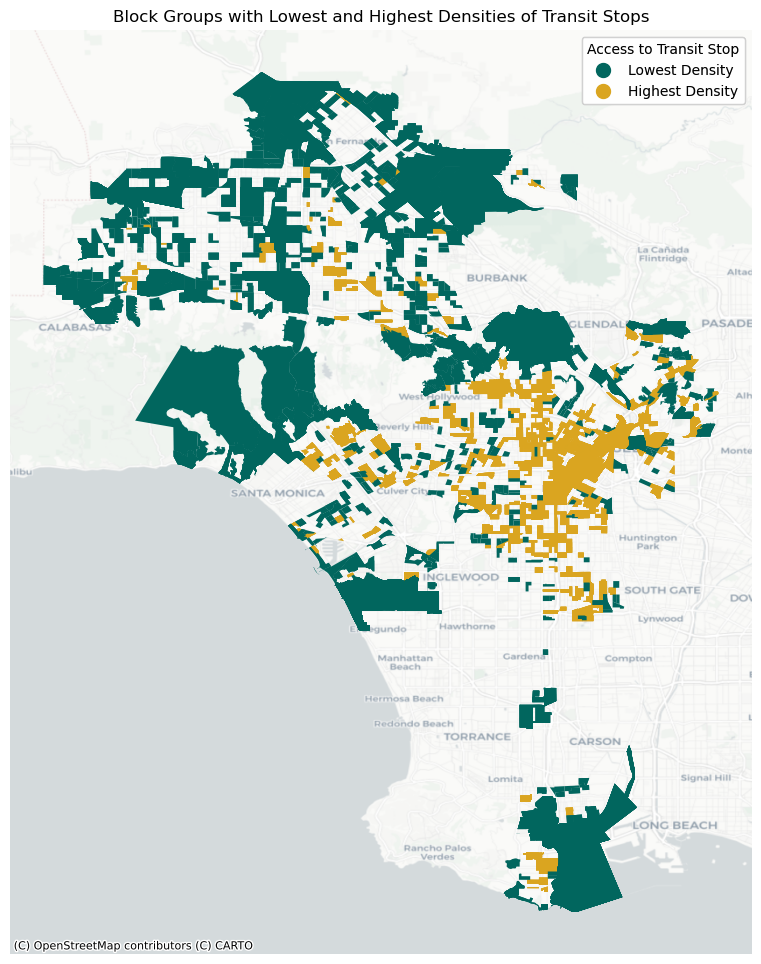

In [6]:

# Add manual legend
color_dict = {'Lowest Density': '#01665e',
 'Highest Density': '#DAA520'}

# Now I create a "colors" column in each separate dataframe that denotes the color I want things to show up as.
lowtransitdensebg["colors"] = '#01665e'
hightransitdensebg["colors"] = '#DAA520'

# Now I create my actual map with the three geodataframes added in the appropriate order (zorder).
fig,ax = plt.subplots(figsize=(12,12))
lowtransitdensebg.plot(ax=ax, zorder=2, color=lowtransitdensebg['colors'])
hightransitdensebg.plot(ax=ax, zorder=1, color=hightransitdensebg['colors'])

# Add manual legend.
from matplotlib.lines import Line2D
custom_points = [Line2D([0], [0], marker="o", linestyle="none", markersize=10, color=color) for color in color_dict.values()]
leg_points = ax.legend(custom_points, color_dict.keys(), title="Access to Transit Stop")
ax.add_artist(leg_points)

#Format plot.
ax.axis('off')
ax.set_title('Block Groups with Lowest and Highest Densities of Transit Stops')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=4326)

Scaling Up to Neighborhoods

In [ ]:
lowtransitdensebg = lowtransitdensebg.drop('index_right', axis=1)

In [ ]:
lowtransitdense_nbrhood = gpd.sjoin(lowtransitdensebg, neighborhoods)
lowtransitdense_nbrhood.sample(1)

In [ ]:
#What are the unique neighborhood names? 
neighborhoods.name.unique()